# DataFrame이 제공하는 함수들
### (집계함수, 통계기반 함수..)


## 기댓값 (expected value)
>- 어떤 확률을 가진 사건을 무한히 반복했을 때, 얻을 수 있는 값의 평균으로 기대할 수 있는 값.


### 주사위 1개를 던지는 사건을 무한히 반복했을 때의 기댓값은?

In [2]:
### 주사위 1개를 던지는 사건을 무한히 반복했을 때의 기댓값은?
import numpy as np

result = np.random.randint(1,7,(1000000,))
print(result.mean()) #  3.50021..

3.50021


## 편차 (deviation)
>- 확률변수 x와 평균 (기댓값)의 차이
>- 편차를 이용하면 데이터의 흩어진 정도를 알기 쉽다.

- 편차의 합은 0
- 편차의 가장 큰 단점은, 데이터가 흩어진 정도를 하나의 숫자로 표현하기 힘들다는 것이다.


## 분산 (variance)
>- 데이터의 흩어진 정도를 알기 위해서 사용한다.
>- **편차의 제곱의 평균**
>- 제곱을 사용해서 사용하기 애매하다..

## 표준편차 (std: standard deviation)
>- 분산의 제곱근

In [4]:
import numpy as np

arr = np.array([4, 6, 1, 3, 8, 8], dtype=np.int32)
print(arr)        # [4 6 1 3 8 8]
print(arr.sum())  # 30
print(arr.mean()) # 5.0
print(arr.var())  # 6.666666666666667
print(arr.std())  # 2.581988897471611

[4 6 1 3 8 8]
30
5.0
6.666666666666667
2.581988897471611


# 공분산 (covariance)
>- 두 개의 확률변수의 관계를 보여줄 때 사용하는 값
>- 공분산은, 두 확률변수의 편차의 곱에 대한 평균
>- 확률변수 X(독립변수)와 Y(종속변수)에 대해 X가 변할 때 Y가 변하는 정도.

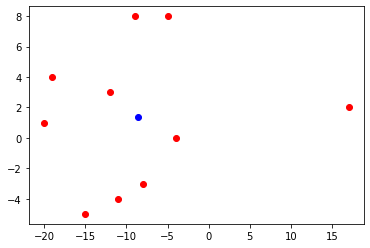

In [7]:
# 그래프를 이용해서 공분산의 의미를 파악해보자

import numpy as np
import matplotlib.pyplot as plt

# 독립변수 X에 대해 종속변수 Y의 값을 랜덤으로 생성한다.
np.random.seed(1)

x = np.random.randint(-20, 20, (10, ))
y = np.random.randint(-10, 10, (10, ))

x_mean = x.mean() # X의 평균
y_mean = y.mean() # Y의 평균

# 이렇게 구한 값으로 산점도 (scatter) 그리기
plt.scatter(x, y, color='red')
plt.scatter(x_mean, y_mean, color='blue')
plt.show()

- 공분산은 데이터 변화량에 대한 총합을 의미한다.
- 공분산이 양수인지 음수인지에 따라 데이터의 방향성을 알 수 있다.
- 공분산의 단점: 단위의 문제때문에, 연관성은 알 수 있지만 강도는 알 수 없다.


- 만약 확률변수 X, Y가 독립이라면 공분산값은 0에 수렴한다.
- 역은 성립하지 않는다. 공분산이 0이라고 두 확률변수가 독립이라고 이야기 할 수는 없다.

In [10]:
# 간단하게 공분산을 계산해보자.

np.random.seed(2)
sampleNum = 100   # 데이터의 개수

x = np.random.randint(0, 10,(sampleNum,))
y = np.random.randint(-20, 20,(sampleNum,))

x_mean = x.mean()  # X의 평균
y_mean = y.mean()  # Y의 평균

# 공분산은 편차의 곱의 평균
x_deviation = x - x_mean
y_deviation = y - y_mean

result = 0
for tmp in range(sampleNum):
    result += (x_deviation[tmp] * y_deviation[tmp])
    
result_covariance = result / (sampleNum-1)   # 표본공분산.  

print(result_covariance)
print(np.cov(x,y))

-0.591515151515151
[[  7.52767677  -0.59151515]
 [ -0.59151515 123.99636364]]


## 공분산을 알아보았으니 예제를 통해서 진짜로 그런지 알아보자
- 주가를 통해 공분산의 양수, 음수 의미 알아보기
- KOSPI 200 : 대형회사 200개의 주가로 만든 또 다른 지수
- KOSPI 200 안에서 삼성전자의 비중이 34% 정도다
- 삼성전자가 오르면 KOSPI가 오르고, 삼성전자가 떨어지면 KOSPI가 떨어진다.

- 공분산으로는 두 데이터의 관계가 얼마나 강한지는 알 수 없다.

In [12]:
# pandas_datareader
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr  # 주가 데이터를 받기 위해서 필요
from datetime import datetime         # 날짜 객체를 만들기 위해

# 특정 날짜간격동안 주식 데이터를 받아온다.
# 특정 날짜 간격을 정하기 위해 datetime을 이용하여 시작 날짜와 끝날 날짜를 지정 
start = datetime(2019, 1, 1) # 2019년 1월 1일
end = datetime(2019, 12, 31)

# YAHOO에서 제공하는 주가지수 얻어오기
df_KOSPI = pdr.DataReader('^KS11', 'yahoo', start, end)  # KOSPI
df_SE = pdr.DataReader('005930.KS', 'yahoo', start, end) # 삼성전자

display(df_KOSPI.head())  # 종가 => 'Close' column 이용
display(df_SE.head())

close_KOSPI = df_KOSPI['Close']  # Series
close_SE = df_SE['Close']        # Series

# 공분산 구하기
print(np.cov(close_KOSPI.values, close_SE.values))
# 이 값이 양수다 => 양의 관계이다. 하나가 증가하면 다른 하나도 증가하는 관계

# 공분산으로는 두 데이터의 관계가 얼마나 강한지는 알 수 없다.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,2053.449951,2004.270020,2050.550049,2010.000000,326400.0,2010.000000
2019-01-03,2014.719971,1991.650024,2011.810059,1993.699951,428000.0,1993.699951
2019-01-04,2011.560059,1984.530029,1992.400024,2010.250000,409000.0,2010.250000
2019-01-07,2048.060059,2030.900024,2034.239990,2037.099976,440200.0,2037.099976
2019-01-08,2042.699951,2023.589966,2038.680054,2025.270020,397800.0,2025.270020


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0


[[6.28958682e+03 9.46863621e+04]
 [9.46863621e+04 1.41592089e+07]]


In [14]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr   # 주가데이터를 받기위해서 
from datetime import datetime          # 날짜객체를 만들기 위해서.

# 반대로 움직이는 주식데이터로 공분산이 음수가 되는지 확인
# 남북경협주, 방위산업주

start = datetime(2018,1,1)  # 2019년 1월 1일
end = datetime(2018,12,31)  

df_LIG = pdr.DataReader('079550.KS', 'yahoo', start, end)   # LIG넥스원(방위산업체)
df_PUSAN = pdr.DataReader('011390.KS', 'yahoo', start, end)  # 부산산업(남북경협주)

closed_LIG = df_LIG['Close']       # Series
closed_PUSAN = df_PUSAN['Close']   # Series

# 공분산 구하기
print(np.cov(closed_LIG.values, closed_PUSAN.values))  # 음수

[[ 6.24988174e+07 -3.81494283e+08]
 [-3.81494283e+08  4.64412566e+09]]


### 상관관계, 상관계수 (피어슨 상관계수..)를 더 많이 이용한다.
- 상관계수는 공분산을 이용해서 도출한 값이고, 
- 방향성과 두 데이터의 관련성 (연관성의 강도)도 알 수 있다.
- 상관계수는 -1 ~ 1 사이의 실수값
- 0 : 서로 독립
- 1로 갈수록 양의 상관관계
- -1로 갈수록 음의 상관관계

### 상관계수 (correlation coefficient)
> - 두 대상이 서로 연관성이 있다고 추측되는 관계
> - 그러나 상관관계로 인관관계를 설명할 수는 없다는 것을 조심해야 한다.
> - 인과관계는 **regression**을 이용해서 분석해야 한다.
> - 우리가 실제로 많이 사용하는 상관계수는 (-1 ~ 1 사이의 실수)

In [18]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr  # 주가 데이터를 받기 위해서 필요
from datetime import datetime         # 날짜 객체를 만들기 위해

# 특정 날짜간격동안 주식 데이터를 받아온다.
# 특정 날짜 간격을 정하기 위해 datetime을 이용하여 시작 날짜와 끝날 날짜를 지정 
start = datetime(2018, 1, 1) # 2019년 1월 1일
end = datetime(2018, 12, 31)

# YAHOO에서 제공하는 주가지수 얻어오기
df_KOSPI = pdr.DataReader('^KS11', 'yahoo', start, end)  # KOSPI
df_SE = pdr.DataReader('005930.KS', 'yahoo', start, end) # 삼성전자

close_KOSPI = df_KOSPI['Close']  # Series
close_SE = df_SE['Close']        # Series

# 상관계수 구하기
print(np.corrcoef(close_KOSPI.values, close_SE.values))

[[1.         0.91357384]
 [0.91357384 1.        ]]


# DataFrame 분석용 함수

### - 중첩립스트(matrix)를 이용하여 DataFrame을 만든다 
- `np.nan` => NaN


### `sum()`
- 행 합계를 구할 때는 `sum(axis=1)` 메서드를 사용한다.
- 열 합계를 구할 때는 `sum(axis=0)` 메서드를 사용하는데 `axis`인수의 디폴트 값이 0이므로 `axis`인수를 생략할 수 있다.

In [21]:
# DataFrame 분석용 함수
import numpy as np
import pandas as pd

# 지금까지는 DataFrame을 생성할 때 지금까지는 dictionary로 만들었다.
# 중첩립스트를 이용하여 DataFrame을 만든다 => matrix를 이용한다.
# np.nan => NaN

data = [[2, np.nan],
       [7, -3],
       [np.nan, np.nan],
       [1, -2]]

df = pd.DataFrame(data,
                 columns=['one', 'two'],
                 index=['a', 'b','c', 'd'])

display(df)

###############################################

print("\n df.sum() -> 열 합계")
print(df.sum()) 
# numpy일 때는 sum()에 axis를 주지 않으면 axis=None로 설정
# sum()의 대상이 ndarray 전체 요소에 적용되었다.
# DataFrame에서는 sum()을 적용하면 DataFrame의 모든 요소를 대상으로 하지 않는다.
# axis=0
# Series로 리턴된다.
# skipna = True(default)

print("\n df.sum(axis=1) -> 행 합계를 구할 때는 sum(axis=1)")
print(df.sum(axis=1))

print("\n df['one'].sum() -> 특정 열에 대한 합")
print(df['one'].sum())     # 특정 열에 대해 합을 구할 수 있다.

,one,two
a,2.0,NaN
b,7.0,-3.0
c,NaN,NaN
d,1.0,-2.0



 df.sum() -> 열 합계
one    10.0
two    -5.0
dtype: float64

 df.sum(axis=1) -> 행 합계를 구할 때는 sum(axis=1)
a    2.0
b    4.0
c    0.0
d   -1.0
dtype: float64

 df['one'].sum() -> 특정 열에 대한 합
10.0


# DaraFrame의 정렬
- ndarray matrix의 sort와 다르다.

### pandas의 `date_range()` : 날짜 간격을 제공하는 함수

### Index는 다른 list나 numpy array로 '대체'하는 것이지 자체를 바꿀 수는 없다.
#### - `suffle()` 대신 `permutation()` 사용
#### - `reindex()`

In [29]:
# DaraFrame의 정렬

import numpy as np
import pandas as pd

# 난수의 재현성을 확보
np.random.seed(7)

# 2차원 ndarray를 정수형 난수로 생성하고, 그 ndarray를 이용해서 DataFrame을 생성
df = pd.DataFrame(np.random.randint(0, 10, (6, 4)))
display(df)

# colum 지정
df.columns = ['A', 'B', 'C', 'D']
display(df)

# 숫자 index 대신 날짜 사용하기
df.index = pd.date_range('20200101', periods=6)
display(df)

###########################################################
print("#####################################################")

# 정렬 연습 하기
# index 부분 shuffle 하기

arr = np.array([1, 2, 3, 4, 5])
np.random.shuffle(arr) # shuffle은 원본이 바뀐다.
print(arr, "\n")  # [3 5 2 4 1] 

# np.random.shuffle(df.index) 
# Index does not support mutable operation 
# index는 한번 정해지면 변경되지 않는다.
# index는 다른 list나 numpy array로 '대체'하는 것이지 자체를 바꿀 수는 없다.

# index를 수정하지 않고 랜덤으로 섞은 또다른 ndarray를 리턴
random_date = np.random.permutation(df.index) 
print(" permutation() 사용")
display(random_date)

print("\n df2 사용")
df2 = df.reindex(index=random_date,columns=['B', 'A'])
display(df2)

# DataFrame 정렬 두가지
# 1. 정렬된 결과 DataFrame이 return된다.
display(df2.sort_index(axis=1, ascending=False))

# 2. 또 다른 정렬은, 값으로 정렬하는 것이다.
display(df2.sort_values(by=['B', 'A']))  # 2차 정렬도 할 수 있다.

,0,1,2,3
0,4,9,6,3
1,3,7,7,9
2,7,8,9,8
3,7,6,4,0
4,7,0,7,6
5,3,5,8,8


,A,B,C,D
0,4,9,6,3
1,3,7,7,9
2,7,8,9,8
3,7,6,4,0
4,7,0,7,6
5,3,5,8,8


,A,B,C,D
2020-01-01,4,9,6,3
2020-01-02,3,7,7,9
2020-01-03,7,8,9,8
2020-01-04,7,6,4,0
2020-01-05,7,0,7,6
2020-01-06,3,5,8,8


#####################################################
[3 5 2 4 1] 

 permutation() 사용


array(['2020-01-04T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-01-03T00:00:00.000000000'],
      dtype='datetime64[ns]')


 df2 사용


,B,A
2020-01-04,6,7
2020-01-05,0,7
2020-01-06,5,3
2020-01-02,7,3
2020-01-01,9,4
2020-01-03,8,7


,B,A
2020-01-04,6,7
2020-01-05,0,7
2020-01-06,5,3
2020-01-02,7,3
2020-01-01,9,4
2020-01-03,8,7


,B,A
2020-01-05,0,7
2020-01-06,5,3
2020-01-04,6,7
2020-01-02,7,3
2020-01-03,8,7
2020-01-01,9,4


##  `sort_index()`
> - `sort_index()` : index 기반 정렬
- DataFrame에서 정렬은 두가지만 알아두자.=> `axis와 ascending`
 - index 기반 정렬에서 index는 index/ column 두가지를 지칭한다.
 - 정렬된 결과 DataFrame이 return된다. 

In [32]:
print("===행 정렬====")
display(df2.sort_index(axis=0, ascending=True)) # 행정렬/ ascending: 내림차순, 오름차순 설정

print("\n===열 정렬====")
display(df2.sort_index(axis=1, ascending=True))  # 열정렬

===행 정렬====


,B,A
2020-01-01,9,4
2020-01-02,7,3
2020-01-03,8,7
2020-01-04,6,7
2020-01-05,0,7
2020-01-06,5,3



===열 정렬====


,A,B
2020-01-04,7,6
2020-01-05,7,0
2020-01-06,3,5
2020-01-02,3,7
2020-01-01,4,9
2020-01-03,7,8


##  `sort_values()`
> - `sort_values()` : 값으로 정렬

In [33]:
# 또 다른 정렬은, 값으로 정렬
display(df2.sort_values(by='B'))

# 리스트로 정렬 값 여러개 설정 => 2차 정렬
display(df2.sort_values(by=['B', 'A']))

,B,A
2020-01-05,0,7
2020-01-06,5,3
2020-01-04,6,7
2020-01-02,7,3
2020-01-03,8,7
2020-01-01,9,4


,B,A
2020-01-05,0,7
2020-01-06,5,3
2020-01-04,6,7
2020-01-02,7,3
2020-01-03,8,7
2020-01-01,9,4


### DataFrame의 알아두어야 하는 기본 함수들에 대해 이야기 하고 있다.
- `sum()`, `mean()`.. 집계함수
- 통계에 관련된 공분산, 상관계수 관련 함수들
- 정렬에 대한 `sort()`
- 3개 정도 더 알아보자

In [34]:
import numpy as np
import pandas as pd

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0, 10, (6, 4)),
                 index=pd.date_range('20200101', periods=6),
                 columns=['A', 'B', 'C', 'D'])
df['E'] = ['AA', 'BB', 'CC', 'CC', 'AA', 'CC']

display(df)

,A,B,C,D,E
2020-01-01,5,8,9,5,AA
2020-01-02,0,0,1,7,BB
2020-01-03,6,9,2,4,CC
2020-01-04,5,2,4,2,CC
2020-01-05,4,7,7,9,AA
2020-01-06,1,7,0,6,CC


In [35]:
# 중복을 없애고 unique한 값만을 추출한다.
print(df['E'].unique())
#  # ['AA' 'BB' 'CC']  # 많이 사용된다.

['AA' 'BB' 'CC']


In [36]:
# 각각의 값들의 개수를 Series로 알아낼 수 있다.
print(df['E'].value_counts())

CC    3
AA    2
BB    1
Name: E, dtype: int64


In [37]:
# 값이 포함되어 있는지 확인하는 함수 => boolen indexing (mask)
print(df['E'].isin(['AA', 'BB']))

2020-01-01     True
2020-01-02     True
2020-01-03    False
2020-01-04    False
2020-01-05     True
2020-01-06    False
Freq: D, Name: E, dtype: bool


# `apply()`와 `lambda`를 이용한 처리
- DataFrame의 유용한 함수 중, 많이 사용되지만 사용하기 쉽지 않은 것
- `apply()`와 `lambda`를 이용한 처리

In [39]:
import numpy as np
import pandas as pd

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0, 10, (6, 4)),
                 index=pd.date_range('20200101', periods=6),
                 columns=['A', 'B', 'C', 'D'])
display(df)

# python의 lambda식
# x를 x.max() - x.min()로 대체

my_func = lambda x: x.max() - x.min()
df['최대-최소'] = df.apply(my_func, axis=1)
display(df)

print(df.apply(my_func, axis=0))

,A,B,C,D
2020-01-01,5,8,9,5
2020-01-02,0,0,1,7
2020-01-03,6,9,2,4
2020-01-04,5,2,4,2
2020-01-05,4,7,7,9
2020-01-06,1,7,0,6


,A,B,C,D,최대-최소
2020-01-01,5,8,9,5,4
2020-01-02,0,0,1,7,7
2020-01-03,6,9,2,4,7
2020-01-04,5,2,4,2,3
2020-01-05,4,7,7,9,5
2020-01-06,1,7,0,6,7


A        6
B        9
C        9
D        7
최대-최소    4
dtype: int64
